# C2M3: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Motivate the use of two-way ANOVA through real data analysis examples.

2. Interpret the two-way ANOVA model, with and without interaction terms.

3. Construct and interpret interaction plots to visually assess the importance of an interaction term.

4. Conduct hypothesis tests to decide whether a two-way ANOVA interaction term is statistically significant.

5. Use the two-way ANOVA and ANCOVA models to answer research questions using real data.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [23]:
# Load Required Packages
library(tidyverse)
library(ggplot2) # a package for nice plots!
library(dplyr)
library(emmeans)

# Problem 1: e-reader data

In this assignment, we learn to answer our two-way ANOVA research questions through the analysis of real data. We will use the ereader data. The study that generated these data can be found here: [P.-C. Chang, S.-Y. Chou, K.-K. Shieh (2013). "Reading Performance and Visual Fatigue When Using Electronic Displays in Long-Duration Reading Tasks Under Various Lighting Conditions," Displays, Vol. 34,
pp. 208-214.](http://users.stat.ufl.edu/~winner/data/ereader1.txt)) 

Electronic paper display devices, such as the Amazon Kindle have changed the way that people read. But has it changed for the better? In a 2013 study titled "Reading Performance and Visual Fatigue When Using Electronic Displays in Long-Duration Reading Tasks Under Various Lighting Conditions", researchers set out to ask whether reading speed (a continuous variable) differed across different electronic paper displays. In addition, they were also interested in whether different lighting conditions impacted reading speed. As such, this experiment had one response with two different factors:

1. Device type: three different types.
    1. Sony PRS-700 with a 6-in. display, $800 \times 600$ resolution; 
    2. Amazon Kindle DX with a 9.7-in. display, $1200 \times 824$ resolution; and 
    3. iRex 1000S with a 10.2-in. display, $1024 \times 1280$ resolution.


2. Lighting Condition: four different conditions (200Lx,500Lx, 1000Lx, 1500Lx), Lx = lux, one lumen per square meter


3. Reading Time: measured in seconds.

With these data, we might ask the following **research questions**:

1. Are the effects of device type significant? That is, is there evidence that suggests that individuals read at different speeds based on the device that they are using?


2. Are the effects of lighting conditions significant? That is, is there evidence that suggests that individuals read at different speeds based on the reading lighting conditions?


3. Do device type and lighting conditions *interact*? For example, Suppose that, on average, people can read for longer on device A than on device B, in low light. Is that trend the same in medium light, or bright light? If not, for example, if B is better than A in bright light, then type and lighting interact.

Through this entire analysis, let's set $\alpha = 0.05$. 

**First, let's read in the data, and store the appropriate variables as factors.**

In [24]:
# Load the data
read = read.csv("ereader.txt", sep="\t")

names(read) = c("device", "light", "time")
read$device = as_factor(read$device)
read$light = as.factor(read$light)
read$light = recode(read$light, "1" = "200Lx", "2" = "500Lx", "3" = "1000Lx", "4" = "1500Lx") 

summary(read)

 device    light         time       
 1:19   200Lx :14   Min.   : 543.8  
 2:20   500Lx :15   1st Qu.: 861.4  
 3:20   1000Lx:15   Median :1105.4  
        1500Lx:15   Mean   :1090.2  
                    3rd Qu.:1300.0  
                    Max.   :1797.2  

In [25]:
read %>% head()

,device,light,time
,<fct>,<fct>,<dbl>
1,1,200Lx,1405.92
2,1,200Lx,1797.21
3,1,200Lx,1155.96
4,1,200Lx,1295.44
5,1,500Lx,1022.32
6,1,500Lx,1538.07


**1.(a) Construct interaction plots, and visually assess and comment on whether interactions are present.**

`geom_smooth()` using formula 'y ~ x'



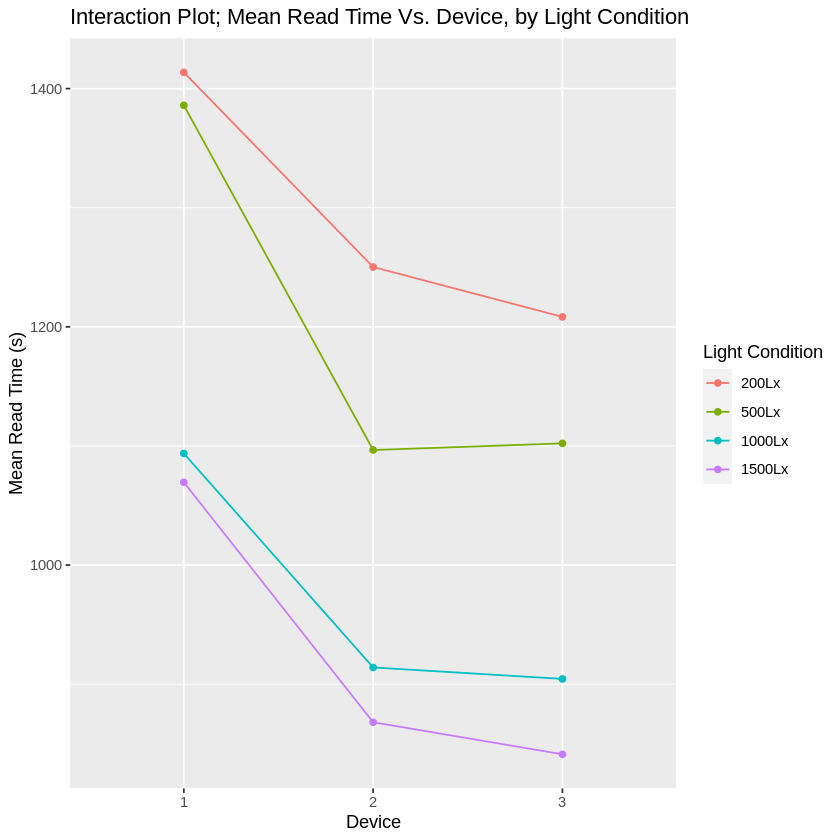

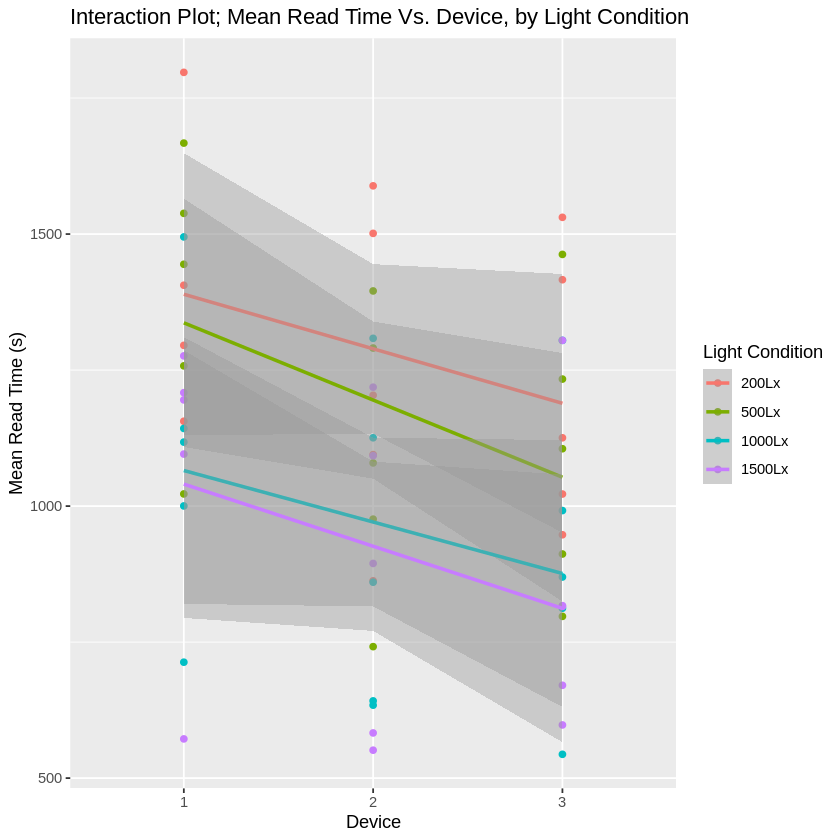

`geom_smooth()` using formula 'y ~ x'



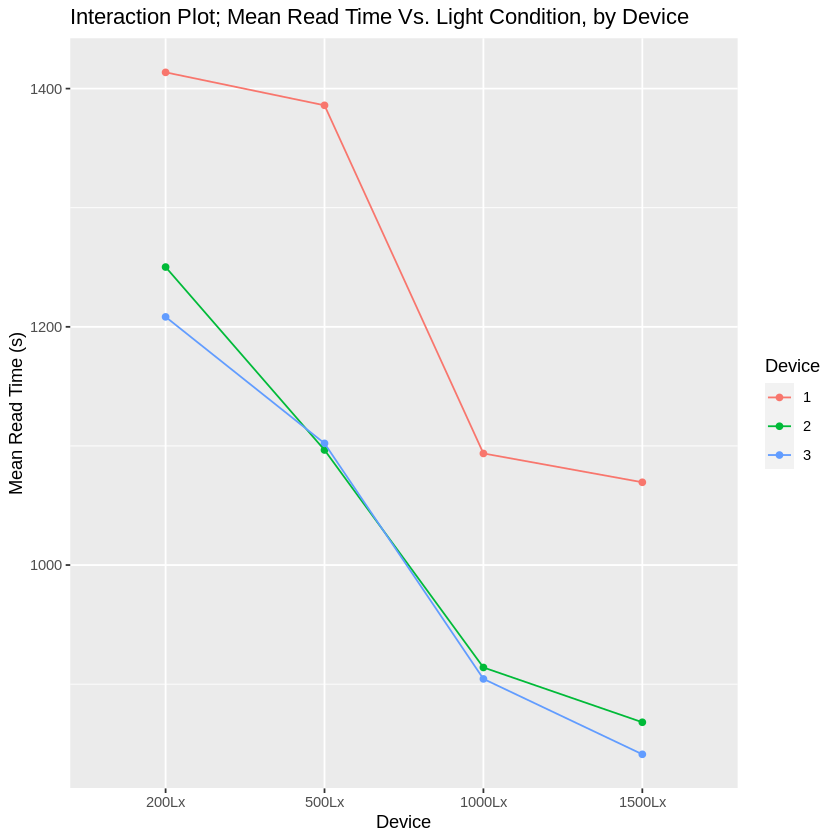

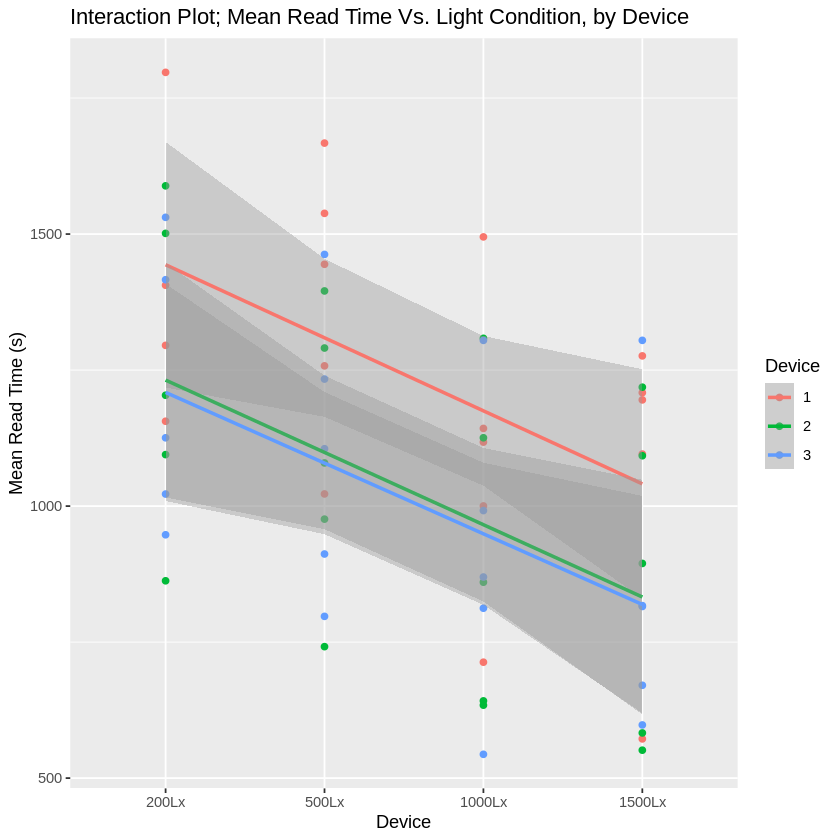

In [26]:
# Your Code Here
read %>%
    group_by(device, light) %>%
        summarise(mean_read_time = mean(time)) %>%
            ggplot(aes(x = device, y = mean_read_time, group = light, color = light)) + 
            geom_point() +
            geom_line() + 
            labs(x = "Device",
                 y = "Mean Read Time (s)",
                 color = "Light Condition",
                 title = "Interaction Plot; Mean Read Time Vs. Device, by Light Condition")

read %>%
    ggplot(aes(x = device, y = time, group = light, color = light)) + 
    geom_point() +
    geom_smooth(method = "lm", se = TRUE) + 
    labs(x = "Device",
         y = "Mean Read Time (s)",
         color = "Light Condition",
         title = "Interaction Plot; Mean Read Time Vs. Device, by Light Condition")

read %>%
    group_by(device, light) %>%
        summarise(mean_read_time = mean(time)) %>%
            ggplot(aes(x = light, y = mean_read_time, group = device, color = device)) + 
            geom_point() +
            geom_line() + 
            labs(x = "Device",
                 y = "Mean Read Time (s)",
                 color = "Device",
                 title = "Interaction Plot; Mean Read Time Vs. Light Condition, by Device")
                 
read %>%
    ggplot(aes(x = light, y = time, group = device, color = device)) + 
    geom_point() +
    geom_smooth(method = "lm", se = TRUE) + 
    labs(x = "Device",
         y = "Mean Read Time (s)",
         color = "Device",
         title = "Interaction Plot; Mean Read Time Vs. Light Condition, by Device")

# My Response:

There seems to be an interaction between Light Condition and Device for Device 2 and light condition 200 Lumens per square meter. This is shown in the "slopes" between each node of mean read time not following the same pattern as the other groups. That is to say, the graphs seem to show that Device two performed better than the other groups at the 200 lumen per square foot level after adjusting for group means. 

It is important to note that the linear models created by grouping over each factor have standard errors large enough that each slope can be adjusted such that all models are parallel. This indicates that the following partial F-test will indicate insignificant interactions at any reasonable value of $\alpha$.

**1.(b) Now, let's formally test for an interaction. Fit a model with an interaction, and one without, and conduct an F-test. State the appropriate decision for the test.**

In [27]:
# Your Code Here
modelWithInt = lm(time ~ device + light + device:light, data = read)
modelWithoutInt = lm(time ~ device + light, data = read)

summary(modelWithoutInt)

anova(modelWithoutInt, modelWithInt)


Call:
lm(formula = time ~ device + light, data = read)

Residuals:
   Min     1Q Median     3Q    Max 
-500.0 -194.6  -24.8  204.9  460.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1438.25      87.22  16.489  < 2e-16 ***
device2      -209.73      83.89  -2.500 0.015547 *  
device3      -227.93      83.89  -2.717 0.008879 ** 
light500Lx    -97.46      97.30  -1.002 0.321052    
light1000Lx  -321.66      97.30  -3.306 0.001704 ** 
light1500Lx  -366.16      97.30  -3.763 0.000421 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 261.7 on 53 degrees of freedom
Multiple R-squared:  0.3455,	Adjusted R-squared:  0.2838 
F-statistic: 5.596 on 5 and 53 DF,  p-value: 0.0003268


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,53,3628970,NA,NA,NA,NA
2,47,3603108,6,25861.55,0.05622427,0.9992146


# My Comments:

Before proceeding to a partial F-test, we must first check whether the model without interaction terms (the "reduced model") has any statistically significant parameters worth estimating. If it does not, then the null model $Y_i = \bar{Y}$ is the best that is justified. This check is performed with a full F-test. Above I call summary() on the reduced model, which yields a full F-test p-value of 0.0003268. We have pre-specified $\alpha = 0.05$, so we reject the null hypothesis that the the null model is sufficient, and instead adopt the reduced model. Really we should do a walk through the parameter space using RegSubsets and compare aic / bic / adjusted r^2, but that's not always practical in an industrial setting due to computation cost concerns. I'll print out the summaries of the other possible models (time ~ light) and (time ~ device) below for comparison - they both have lower adjusted r^2, so they can be safely ignored.

In order to decide between the interaction and non-interaction models, we perform a partial F-test. The hypotheses being tested in the partial F test are as follows:

- $H_0:$ The reduced model is sufficient.

- $H_1:$ The reduced model is not sufficient (at least some interaction terms are necessary).

The partial F-test returns a p-value of 0.9992146, which is VERY strong evidence that no interaction terms are statistically significant. 

In [28]:
justLight = lm(time ~ light, data = read)
justDevice = lm(time ~ device, data = read)

summary(justLight)
summary(justDevice)


Call:
lm(formula = time ~ light, data = read)

Residuals:
   Min     1Q Median     3Q    Max 
-453.2 -237.2   13.5  234.1  524.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1281.94      74.28  17.259   <2e-16 ***
light500Lx    -87.04     103.28  -0.843   0.4030    
light1000Lx  -311.24     103.28  -3.014   0.0039 ** 
light1500Lx  -355.74     103.28  -3.445   0.0011 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 277.9 on 55 degrees of freedom
Multiple R-squared:  0.2339,	Adjusted R-squared:  0.1921 
F-statistic: 5.597 on 3 and 55 DF,  p-value: 0.002013



Call:
lm(formula = time ~ device, data = read)

Residuals:
    Min      1Q  Median      3Q     Max 
-659.51 -197.73  -22.24  216.16  565.62 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1231.59      68.42  17.999   <2e-16 ***
device2      -199.39      95.55  -2.087   0.0415 *  
device3      -217.59      95.55  -2.277   0.0266 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 298.3 on 56 degrees of freedom
Multiple R-squared:  0.1016,	Adjusted R-squared:  0.0695 
F-statistic: 3.166 on 2 and 56 DF,  p-value: 0.04982


**1.(c) Before we interpret this model with respect to research question #1 above (just below the data description), let's decide whether the differences that the model reports are statistically significant.**   

**Investigate this question using Bonferroni post hoc comparisons. That is, conduct all pairwise post hoc comparisons for device type using a Bonferroni correction and an overall type I error rate of $\alpha = 0.05$. Comment on the results.**

In [52]:
# Your Code Here
library(emmeans)
fit <- emmeans(modelWithoutInt, "light", data = read)
pairs(fit, adjust = "bonferroni")
fit2 <- emmeans(modelWithoutInt, "device", data = read)
pairs(fit2, adjust = "bonferroni")

 contrast        estimate   SE df t.ratio p.value
 200Lx - 500Lx       97.5 97.3 53 1.002   1.0000 
 200Lx - 1000Lx     321.7 97.3 53 3.306   0.0102 
 200Lx - 1500Lx     366.2 97.3 53 3.763   0.0025 
 500Lx - 1000Lx     224.2 95.5 53 2.346   0.1363 
 500Lx - 1500Lx     268.7 95.5 53 2.812   0.0413 
 1000Lx - 1500Lx     44.5 95.5 53 0.466   1.0000 

Results are averaged over the levels of: device 
P value adjustment: bonferroni method for 6 tests 

 contrast estimate   SE df t.ratio p.value
 1 - 2       209.7 83.9 53 2.500   0.0466 
 1 - 3       227.9 83.9 53 2.717   0.0266 
 2 - 3        18.2 82.7 53 0.220   1.0000 

Results are averaged over the levels of: light 
P value adjustment: bonferroni method for 3 tests 

# My Comments:

We have determined that there are no statistically significant interaction terms in the dataset, so I perform two all-pairs bonferroni tests, one for each factor in the two-way ANOVA. 

The first pairwise test shows that we can meaningfully distinguish (using units Lumens per square meter) the following pairs from each other as having different mean values of read time at the $\alpha = .05$ level: (200, 1000), (200, 1500), (500, 1500)

The second pairwise test similarly tells us that we can meaningfully distingush the pairs of devices (1, 2) and (1, 3) as having different mean read times.

**1.(d) Using the post hoc comparisons from above, let's focus on research question #1 from above: Are the effects of device type significant? That is, is there any evidence that suggests that individuals read faster or slower based on the device that they are using**

# My Comments:

Device one (The Sony device) had a mean read time that was significantly higher than those of the other devices. Reading rate was not the response recorded in the data, only total read time. We can only say that readers read longer on the Sony device, not that they read faster.